In [1]:
include("isolation-forest.jl")

compute_paths_single_tree (generic function with 2 methods)

In [2]:
using Printf,   StatsBase , Random, Distributions, LinearAlgebra, Plots,BenchmarkTools,Plots

# Utility Function

In [3]:
function getDepth(x, root, d)
    n = root.n
    p = root.p
    if root.ntype == "exNode"
        return d
    else
        if dot(x-p,n) < 0
            return getDepth(x,root.left,d+1)
        else
            return getDepth(x,root.right,d+1)
        end
    end
end
        
function getVals(forest,x,sorted)
    theta =range(0,stop=2*pi,length= forest.ntrees) 
    r = Float64[]
    for i in 1:forest.ntrees
        temp = compute_paths_single_tree(forest,x,i)
        push!(r,temp[1])
    end
    if sorted
        r = sort(r)
    end
    return r, theta
end

getVals (generic function with 1 method)

In [4]:
dist=MvNormal(zeros(2), Diagonal(ones(2)))
Nobjs = 500
X=rand(dist,Nobjs)
X=collect(transpose(X))

500×2 Array{Float64,2}:
  0.226002   -2.79266
  0.600984    0.674658
  0.740708    0.0358476
 -1.33847     0.5915
 -1.57414    -0.121256
 -1.22001    -0.952048
  0.237873    1.19615
  0.145324    0.151103
  0.89559     0.807744
 -1.13726     0.146373
  0.81169    -0.176094
  0.671089    2.36729
 -0.0260318   1.72537
  ⋮          
  1.54969    -0.101248
 -1.859       0.734049
  0.21852     0.280149
  0.627247   -2.41915
  0.0658719  -1.14842
 -0.45045     0.260772
  1.12201    -0.129869
  0.831543   -0.580231
 -0.459443   -0.819623
  0.224677   -0.0419012
 -0.581045   -1.0275
  0.488089   -2.51353e-5

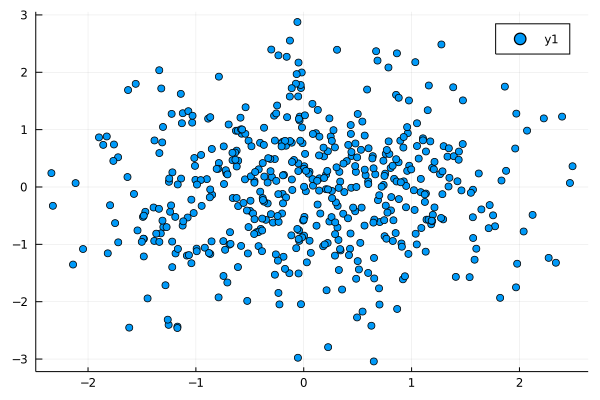

In [5]:
plot(X[:,1], X[:,2], seriestype = :scatter)

In [ ]:
depth=depth_unsuccessful_search(256)
F0  = iForest(X,256,200,depth,0)() # ExtensionLevel=0 is the same as regular Isolation Forest
F1  = iForest(X,256,200,depth,1)()

In [7]:
xxx = zeros(1,2)
@time  SL0 = compute_paths_single_tree(F0,xxx, 1)

  0.237085 seconds (761.91 k allocations: 37.855 MiB)


1-element Array{Float64,1}:
 11.535536635381895

In [8]:
SL0[1]

11.535536635381895

In [9]:
F1.limit

8

# Score

In [10]:
# Score the training data itself to see the distribution of the anomaly scores each point receives. 
S0 = compute_paths(F0)
S1 = compute_paths(F1)

500-element Array{Float64,1}:
 0.6213151127179457
 0.42600701080254294
 0.4174461696863496
 0.5009358601382724
 0.5036736309291818
 0.4705411807684285
 0.454726217893826
 0.4008280537186614
 0.44280565250151943
 0.4554264944238599
 0.4246523742842436
 0.5856423086981833
 0.49043986108347803
 ⋮
 0.48518096704899444
 0.547154498814933
 0.41070097653069554
 0.5892489292836948
 0.44277024068007337
 0.40801794667474245
 0.4369500956741657
 0.4395555171728988
 0.4244679629368953
 0.4020838345732959
 0.4472238436005204
 0.4096901066762213

In [11]:
ss0=sortperm(S0)
ss1=sortperm(S1)

500-element Array{Int64,1}:
 307
   8
 232
  98
 474
 236
 375
 498
 264
 302
 373
 169
 108
   ⋮
  86
 341
 326
 455
 259
   1
 113
 325
 395
 280
 103
  48

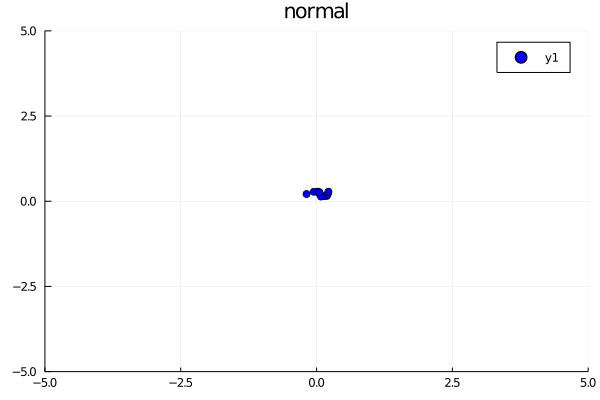

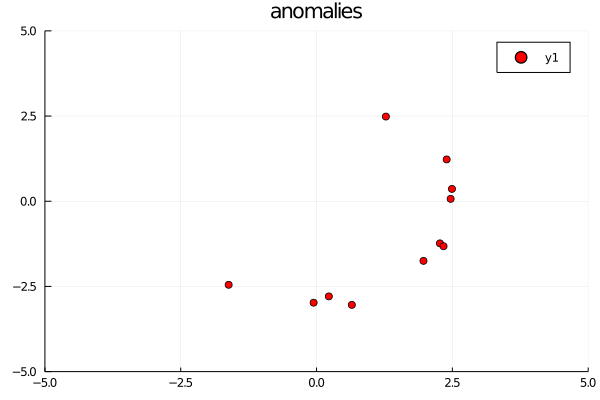

In [12]:
#Extension 0
Plots.default(overwrite_figure=false)
p1 =plot(X[ss0[1:10],1], X[ss0[1:10],2], seriestype = :scatter,xlim=(-5,5), ylim=(-5, 5),color = :blue,title="normal")
l=length(ss0)
p2=plot(X[ss0[l-10:l],1], X[ss0[l-10:l],2], seriestype = :scatter,xlim=(-5,5), ylim=(-5, 5),color = :red,title ="anomalies")

display(p1)
display(p2)

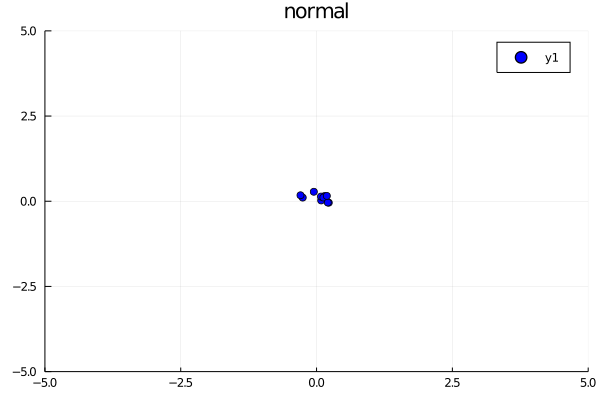

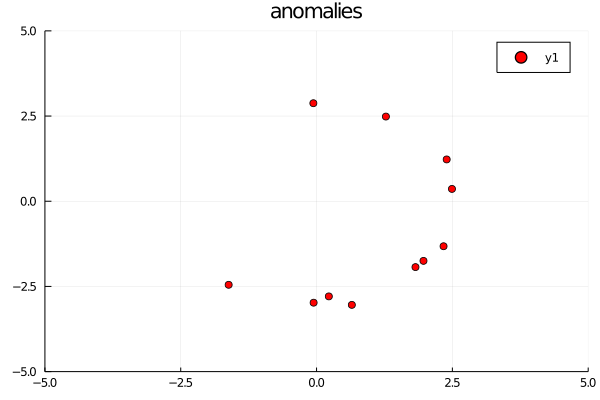

In [13]:
#Extension 1
Plots.default(overwrite_figure=false)
p1 =plot(X[ss1[1:10],1], X[ss1[1:10],2], seriestype = :scatter,xlim=(-5,5), ylim=(-5, 5),color = :blue,title="normal")
l=length(ss1)
p2=plot(X[ss1[l-10:l],1], X[ss1[l-10:l],2], seriestype = :scatter,xlim=(-5,5), ylim=(-5, 5),color = :red,title ="anomalies")

display(p1)
display(p2)

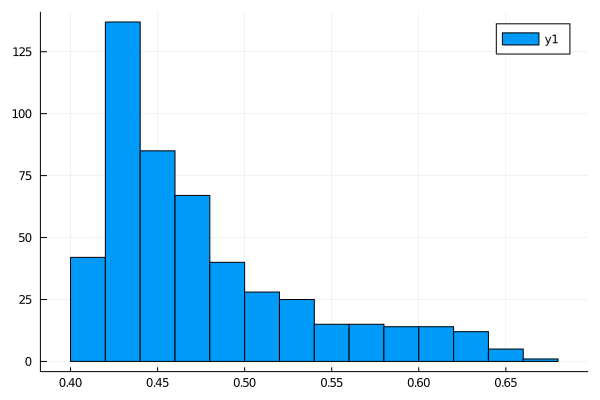

In [14]:
plot(S0, seriestype=:hist)

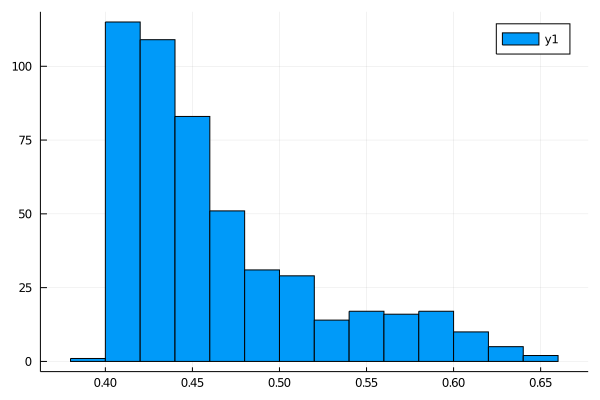

In [15]:
plot(S1, seriestype=:hist)

In [16]:
normal_point= zeros(1,2)
anomaly = reshape([3.3,3.3],:,2)

1×2 Array{Float64,2}:
 3.3  3.3

In [17]:
rn, thetan = getVals(F1,normal_point,true)
mean(rn)

13.430128422155473

In [18]:
ra, thetaa = getVals(F1,anomaly,true)
mean(ra)

5.459076964587806

# Multiple Blobs

In [19]:
dist1=MvNormal([10,0], Diagonal(ones(2)))
Nobjs = 250
X1=rand(dist1,Nobjs)
X1=collect(transpose(X1))

250×2 Array{Float64,2}:
 10.5966    0.472404
 11.4605   -0.928357
  9.92935   0.0578796
  9.37811  -0.228969
  9.86752   0.741024
 10.2087   -1.62046
  8.08285   1.42914
  9.84983   0.477145
  9.45055   0.0803702
 10.3541    1.07422
  9.53869  -0.706041
  7.98474   0.445391
  9.74999   0.00508667
  ⋮        
 10.7189   -0.874797
  9.07254   0.347117
  8.96032   0.873574
 11.1613    1.02481
  7.88142  -1.13974
 10.5018    0.943989
  9.95322   1.09475
  9.46031   0.840887
 10.3057   -0.572138
  8.64875  -0.873339
  9.65923  -0.107818
 11.4117   -0.235225

In [20]:
dist2=MvNormal([0,10], Diagonal(ones(2)))
Nobjs = 250
X2=rand(dist2,Nobjs)
X2=collect(transpose(X2))

250×2 Array{Float64,2}:
 -1.11397    10.3869
  0.556111   10.5996
  0.409303   11.1908
  2.37064     8.71096
  1.05751     9.28987
 -0.426645   12.2663
  0.305938    9.09477
 -0.483599    8.77704
 -0.940963   10.1395
  1.13562     9.89335
  0.419032    9.9102
  1.67532    11.1691
 -0.737947    9.34012
  ⋮          
  0.666071    9.38211
  0.375976   11.0238
 -1.76428    10.1943
  0.803359   10.8853
  2.32848     9.97903
  0.165036   10.7205
 -0.925123    8.99099
 -1.05675    10.7403
 -0.314707    9.53564
 -0.108964   10.9608
  0.0232011   8.78824
  0.968969    9.33209

In [21]:
X=vcat(X1,X2)

500×2 Array{Float64,2}:
 10.5966      0.472404
 11.4605     -0.928357
  9.92935     0.0578796
  9.37811    -0.228969
  9.86752     0.741024
 10.2087     -1.62046
  8.08285     1.42914
  9.84983     0.477145
  9.45055     0.0803702
 10.3541      1.07422
  9.53869    -0.706041
  7.98474     0.445391
  9.74999     0.00508667
  ⋮          
  0.666071    9.38211
  0.375976   11.0238
 -1.76428    10.1943
  0.803359   10.8853
  2.32848     9.97903
  0.165036   10.7205
 -0.925123    8.99099
 -1.05675    10.7403
 -0.314707    9.53564
 -0.108964   10.9608
  0.0232011   8.78824
  0.968969    9.33209

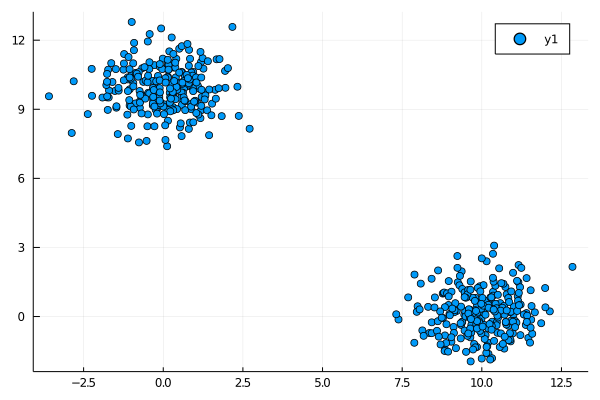

In [22]:
plot(X[:,1], X[:,2], seriestype = :scatter)

In [ ]:
depth=depth_unsuccessful_search(256)
F0  = iForest(X,256,200,depth,0)() # ExtensionLevel=0 is the same as regular Isolation Forest
F1  = iForest(X,256,200,depth,1)()

# Score

In [24]:
# Score the training data itself to see the distribution of the anomaly scores each point receives. 
S0 = compute_paths(F0)
S1 = compute_paths(F1)

500-element Array{Float64,1}:
 0.4229446446251412
 0.5241100278833873
 0.4185791716904483
 0.4278293282678853
 0.42014299534402333
 0.5170439515566088
 0.5498522192543858
 0.41753057877671157
 0.4182591449098962
 0.4456867239037931
 0.4459709541907971
 0.5308230416199315
 0.41583213892258114
 ⋮
 0.4330739802243293
 0.45073950599595586
 0.4987050223967229
 0.45760297620826573
 0.5784863175197824
 0.4320213046076745
 0.4683777847922398
 0.47013728170020175
 0.41975068621939426
 0.44754618993435313
 0.45393265865484483
 0.4490095846183364

In [25]:
ss0=sortperm(S0)
ss1=sortperm(S1)

500-element Array{Int64,1}:
  88
 128
 194
 184
  13
 477
  69
 401
 217
  67
 129
 237
 388
   ⋮
  58
 256
 109
 438
 462
 285
  55
 424
 342
 415
 107
 348

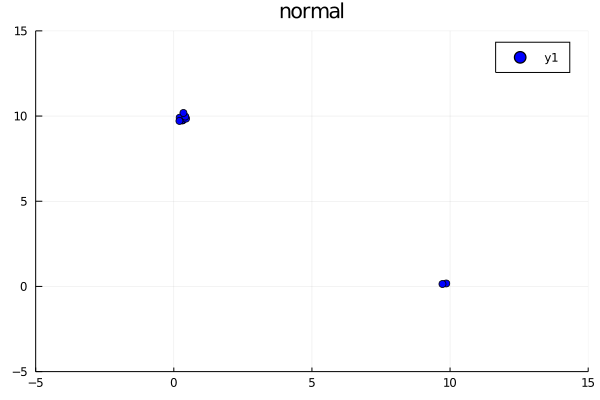

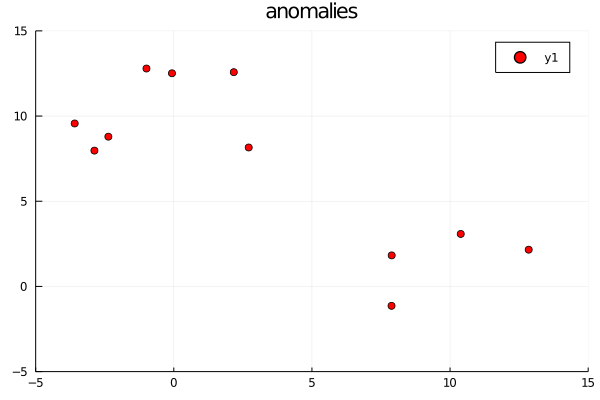

In [26]:
#Extension 0
Plots.default(overwrite_figure=false)
p1 =plot(X[ss0[1:10],1], X[ss0[1:10],2], seriestype = :scatter,xlim=(-5,15), ylim=(-5, 15),color = :blue,title="normal")
l=length(ss0)
p2=plot(X[ss0[l-10:l],1], X[ss0[l-10:l],2], seriestype = :scatter,xlim=(-5,15), ylim=(-5, 15),color = :red,title ="anomalies")

display(p1)
display(p2)

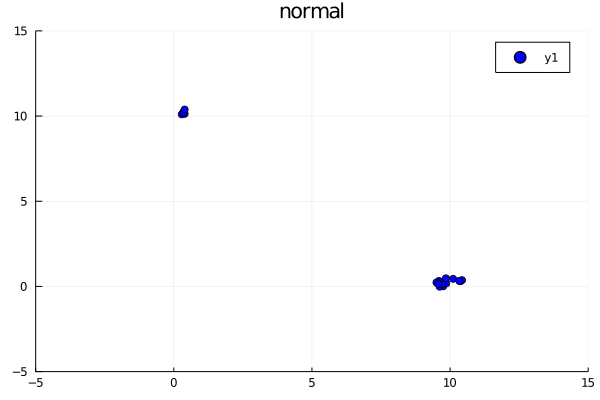

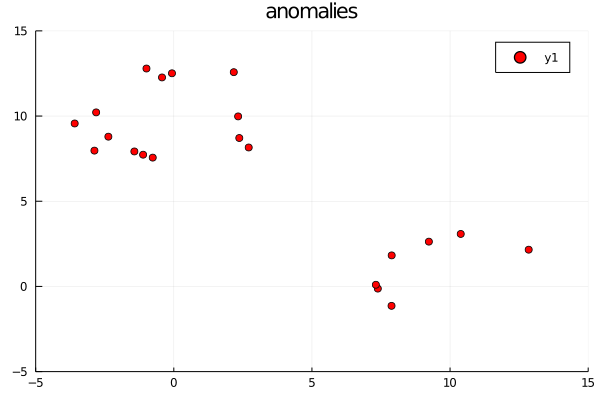

In [27]:
#Extension 1
Plots.default(overwrite_figure=false)
p1 =plot(X[ss1[1:20],1], X[ss1[1:20],2], seriestype = :scatter,xlim=(-5,15), ylim=(-5, 15),color = :blue,title="normal")
l=length(ss1)
p2=plot(X[ss1[l-20:l],1], X[ss1[l-20:l],2], seriestype = :scatter,xlim=(-5,15), ylim=(-5, 15),color = :red,title ="anomalies")

display(p1)
display(p2)

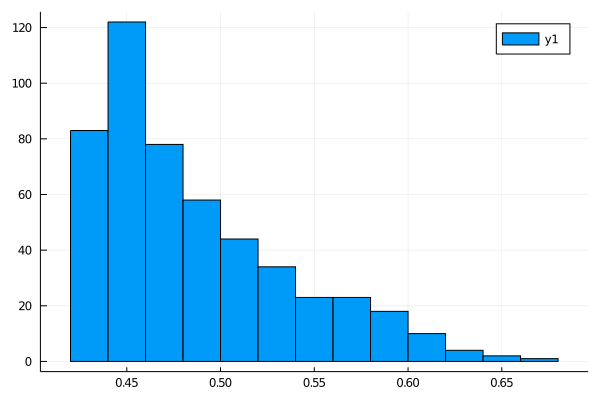

In [28]:
plot(S0, seriestype=:hist)

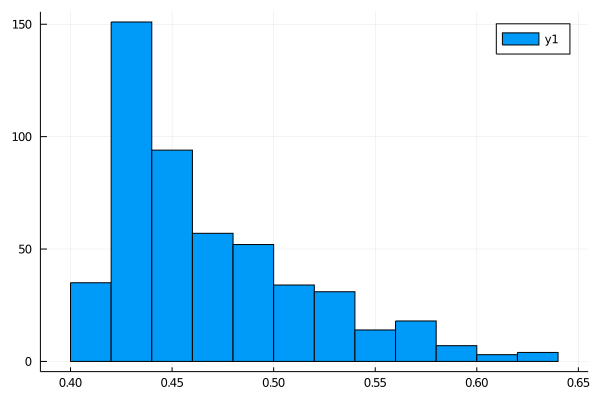

In [29]:
plot(S1, seriestype=:hist)

In [30]:
normal_point=reshape([10,0],:,2) 
anomaly = zeros(1,2)

1×2 Array{Float64,2}:
 0.0  0.0

In [31]:
rn, thetan = getVals(F1,normal_point,true)
mean(rn)

12.708234904853041

In [32]:
ra, thetaa = getVals(F1,anomaly,true)
mean(ra)

5.219179617126838

# Sinusoidal Data

In [33]:
N = 1000
x = rand(N)*8*pi
y = sin.(x) + rand(N)/4.
X=hcat(x,y)

1000×2 Array{Float64,2}:
 11.5874    -0.656814
 20.1693     1.12158
 19.7013     0.845423
  2.05833    1.11129
 10.1391    -0.56613
  4.82862   -0.93598
  8.65968    0.715838
 23.8877    -0.724008
  1.61048    1.20866
  4.31273   -0.886219
  8.54284    0.887322
  1.09646    0.906707
 15.2551     0.573501
  ⋮         
 18.303     -0.282629
 22.1583    -0.0846653
 12.2718    -0.136242
 13.5726     1.07679
 20.0844     1.15937
  4.86119   -0.755172
  9.29279    0.287468
  9.98581   -0.490392
 11.4717    -0.672483
 15.7306     0.109605
 19.1341     0.469756
  0.224794   0.378635

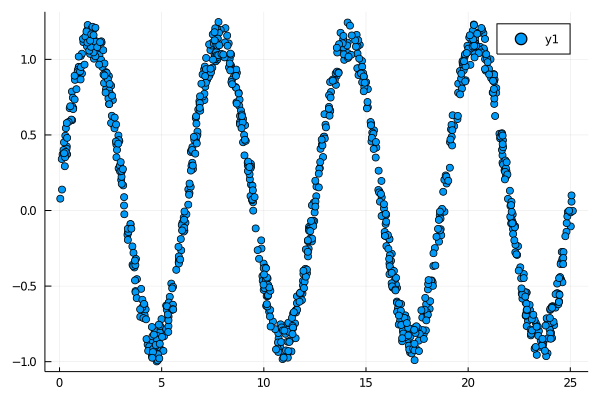

In [34]:
plot(X[:,1], X[:,2], seriestype = :scatter)

In [ ]:
depth=depth_unsuccessful_search(256)
F0  = iForest(X,256,500,depth,0)() # ExtensionLevel=0 is the same as regular Isolation Forest
F1  = iForest(X,256,500,depth,1)()

# Score

In [36]:
# Score the training data itself to see the distribution of the anomaly scores each point receives. 
S0 = compute_paths(F0)
S1 = compute_paths(F1)

1000-element Array{Float64,1}:
 0.4764407265702034
 0.48833520802256325
 0.4956462421300376
 0.5263479110133498
 0.4818537669711181
 0.5030626404438281
 0.48321453962274213
 0.5299233625147359
 0.531502352008549
 0.5240780179291464
 0.48725256259886945
 0.5371648113502956
 0.4940100437464755
 ⋮
 0.5048688974773805
 0.503402840769373
 0.4701795804343655
 0.4983666642396015
 0.4982406823139866
 0.49587095935357334
 0.477027741600679
 0.4889980530982964
 0.476044782849384
 0.48369742191712883
 0.5140643944202774
 0.5760746093977314

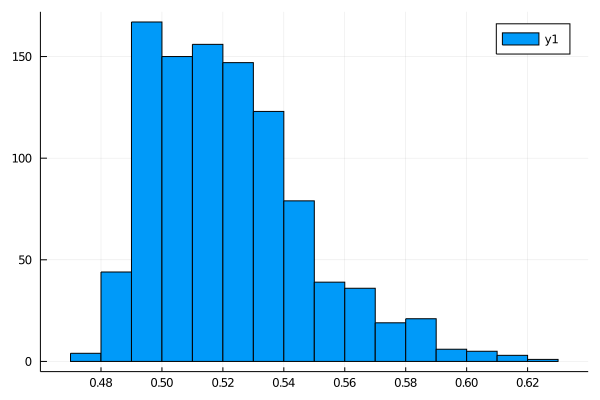

In [37]:
plot(S0, seriestype=:hist)

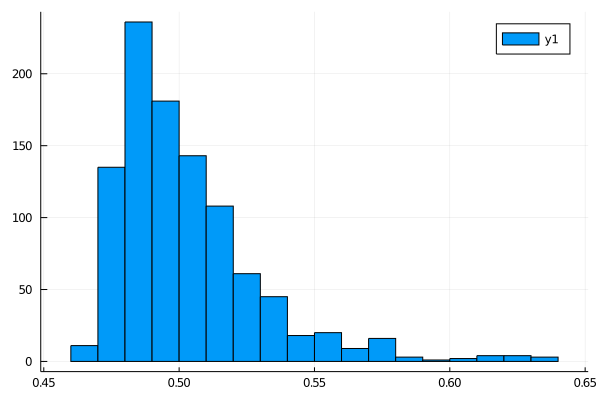

In [38]:
plot(S1, seriestype=:hist)

In [39]:
ss0=sortperm(S0)
ss1=sortperm(S1)

1000-element Array{Int64,1}:
 652
 794
 159
  69
  99
 804
 634
 720
 363
 840
 625
 991
 392
   ⋮
 405
 187
 514
 331
 829
 793
 839
 177
 572
 676
 775
 714

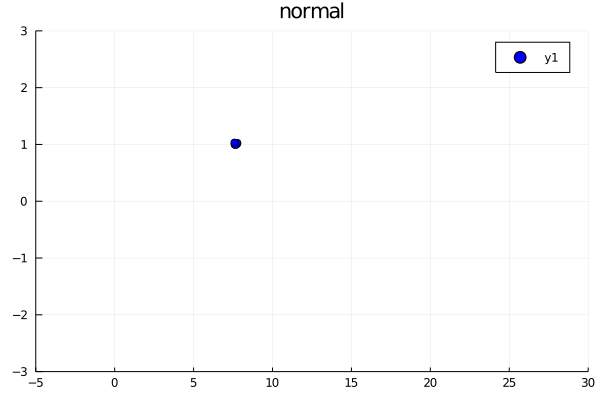

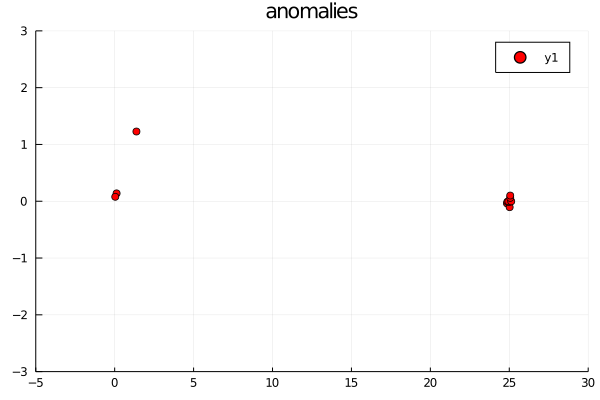

In [40]:
#Extension 0
Plots.default(overwrite_figure=false)
p1 =plot(X[ss0[1:10],1], X[ss0[1:10],2], seriestype = :scatter,xlim=(-5,30), ylim=(-3, 3),color = :blue,title="normal")
l=length(ss0)
p2=plot(X[ss0[l-10:l],1], X[ss0[l-10:l],2], seriestype = :scatter,xlim=(-5,30), ylim=(-3, 3),color = :red,title ="anomalies")

display(p1)
display(p2)

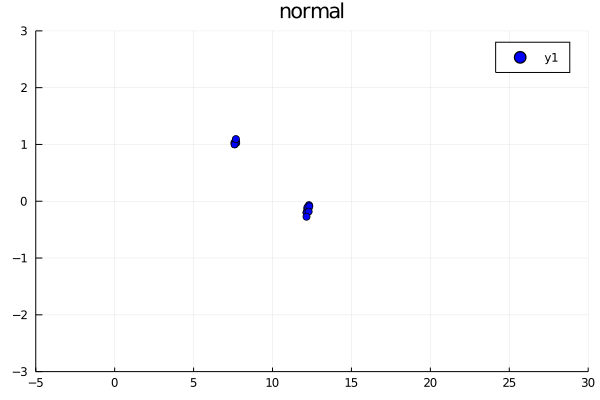

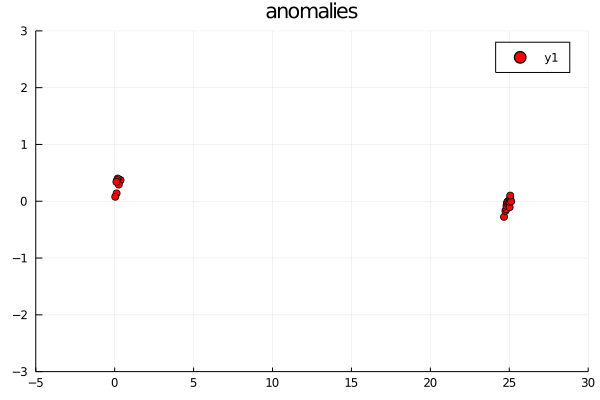

In [41]:
#Extension 1
Plots.default(overwrite_figure=false)
p1 =plot(X[ss1[1:20],1], X[ss1[1:20],2], seriestype = :scatter,xlim=(-5,30), ylim=(-3, 3),color = :blue,title="normal")
l=length(ss1)
p2=plot(X[ss1[l-20:l],1], X[ss1[l-20:l],2], seriestype = :scatter,xlim=(-5,30), ylim=(-3, 3),color = :red,title ="anomalies")

display(p1)
display(p2)